In [1]:
import pandas as pd

train_df = pd.read_csv("../input/train.csv")

In [2]:
import numpy as np

data = train_df.values
np.random.shuffle(data)

In [3]:
labels = data[:, 0]
pixels = data[:, 1:]

In [4]:
from keras.utils import to_categorical

def prepare_pixels(arr):
    return np.array(arr / 255, dtype='float32')

pixels = prepare_pixels(pixels)
labels = to_categorical(labels)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
TOTAL_TRAIN_SAMPLES = 42_000
VAL_SAMPLES = 7_000

val_pixels = pixels[:VAL_SAMPLES]
val_labels = labels[:VAL_SAMPLES]
train_pixels = pixels[VAL_SAMPLES:]
train_labels = labels[VAL_SAMPLES:]

In [6]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_pixels, train_labels, 
                      epochs=30, 
                      batch_size=512, 
                      validation_data=(val_pixels, val_labels))

Train on 35000 samples, validate on 7000 samples
Epoch 1/30
35000/35000 [==============================] - 8s 232us/step - loss: 0.5561 - acc: 0.8496 - val_loss: 0.3421 - val_acc: 0.9010
Epoch 2/30
35000/35000 [==============================] - 1s 24us/step - loss: 0.2565 - acc: 0.9278 - val_loss: 0.2475 - val_acc: 0.9247
Epoch 3/30
35000/35000 [==============================] - 1s 23us/step - loss: 0.1950 - acc: 0.9455 - val_loss: 0.2159 - val_acc: 0.9346
Epoch 4/30
35000/35000 [==============================] - 1s 23us/step - loss: 0.1569 - acc: 0.9559 - val_loss: 0.1764 - val_acc: 0.9480
Epoch 5/30
35000/35000 [==============================] - 1s 23us/step - loss: 0.1292 - acc: 0.9641 - val_loss: 0.1497 - val_acc: 0.9556
Epoch 6/30
35000/35000 [==============================] - 1s 26us/step - loss: 0.1092 - acc: 0.9702 - val_loss: 0.1671 - val_acc: 0.9464
Epoch 7/30
35000/35000 [==============================] - 1s 26us/step - loss: 0.0932 - acc: 0.9738 - val_loss: 0.1288 - val_acc

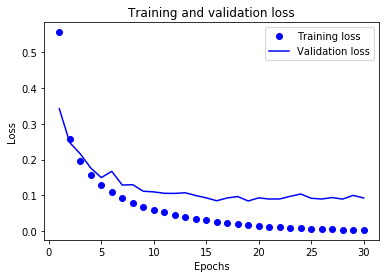

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

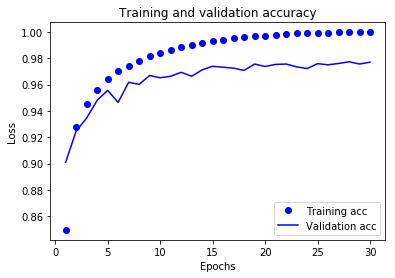

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()